In [2]:
#dependencies
import torch
import torchvision
from torchvision  import datasets,transforms

In [3]:
#downloading the datset, here an inbuilt one.
train=datasets.MNIST('',train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test=train=datasets.MNIST('',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw





Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
train #running to see how exactly it looks like.

Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [5]:
training=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testing=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [6]:
training #this is what it looks like

In [7]:
for data in training:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [8]:
x,y=data[0][1],data[1][1] 
#here x is the independent variable and y is the dependent varible
#data[0] prints the first batch , data[0][1] prints the second element in the batch. 

In [9]:
print(y) #prints 7

tensor(7)


In [10]:
import matplotlib.pyplot as plt

In [10]:
x.shape #here 1 stands for the number of channel
#we won't be able to display it like that so will reshape it

torch.Size([1, 28, 28])

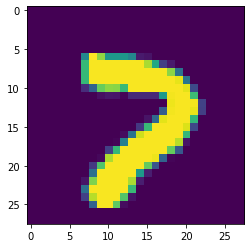

In [11]:
plt.imshow(x.view(28,28)) #need to reshape it to this

In [12]:
import torch.nn as nn
import torch.nn.functional as f

In [13]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(28*28,64) #input layer (input1, output1)- input1 is 784=28*28 and 64 is output1 
    self.fc2=nn.Linear(64,64) #hidden layer (input2=output1,output2)
    self.fc3=nn.Linear(64,64) #hidden layer (input3=output2,output3)
    self.fc4=nn.Linear(64,10) #output layer (input4=output3, output4)

  def forward(self,x):
    x=f.relu(self.fc1(x))
    x=f.relu(self.fc2(x))
    x=f.relu(self.fc3(x))
    x=self.fc4(x)
    return f.log_softmax(x,dim=1)
    
net=Net() #object initialisation
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [14]:
X=torch.rand((28,28)) #randomly generating values
X

tensor([[6.0867e-01, 5.4577e-01, 3.7927e-01, 6.1327e-01, 4.6626e-01, 8.7568e-02,
         4.2334e-02, 8.9840e-01, 8.0172e-01, 9.1401e-01, 9.7105e-01, 7.4222e-01,
         8.6263e-01, 6.4146e-01, 5.1341e-01, 7.3399e-02, 3.4337e-01, 3.3014e-01,
         9.4753e-01, 1.4738e-01, 8.4955e-01, 4.5171e-01, 6.4218e-01, 3.8943e-01,
         1.5231e-01, 7.9997e-01, 1.5439e-01, 8.7933e-01],
        [2.0356e-02, 4.3414e-01, 4.3387e-01, 7.8957e-01, 8.3840e-01, 3.6505e-01,
         2.1178e-02, 5.2568e-01, 3.3096e-02, 6.6959e-01, 1.6417e-01, 1.0079e-01,
         8.3489e-01, 2.8884e-01, 8.2804e-01, 9.4780e-01, 1.8658e-01, 9.3611e-01,
         2.8459e-01, 2.9154e-01, 5.9030e-01, 4.6001e-01, 3.0005e-01, 8.6174e-01,
         8.2252e-01, 8.8626e-01, 4.4166e-01, 4.3931e-01],
        [6.5709e-01, 5.4519e-01, 8.2342e-01, 8.7987e-01, 3.2843e-01, 7.8405e-03,
         4.9642e-01, 8.1398e-01, 1.3859e-01, 4.0075e-01, 9.2273e-01, 3.5416e-01,
         4.1003e-01, 9.4987e-01, 3.8486e-01, 6.4754e-01, 5.0772e-01, 2.455

In [15]:
X=X.view(-1,28*28) #reshaping again to bring the dim of all the mat to an equal size
X

tensor([[6.0867e-01, 5.4577e-01, 3.7927e-01, 6.1327e-01, 4.6626e-01, 8.7568e-02,
         4.2334e-02, 8.9840e-01, 8.0172e-01, 9.1401e-01, 9.7105e-01, 7.4222e-01,
         8.6263e-01, 6.4146e-01, 5.1341e-01, 7.3399e-02, 3.4337e-01, 3.3014e-01,
         9.4753e-01, 1.4738e-01, 8.4955e-01, 4.5171e-01, 6.4218e-01, 3.8943e-01,
         1.5231e-01, 7.9997e-01, 1.5439e-01, 8.7933e-01, 2.0356e-02, 4.3414e-01,
         4.3387e-01, 7.8957e-01, 8.3840e-01, 3.6505e-01, 2.1178e-02, 5.2568e-01,
         3.3096e-02, 6.6959e-01, 1.6417e-01, 1.0079e-01, 8.3489e-01, 2.8884e-01,
         8.2804e-01, 9.4780e-01, 1.8658e-01, 9.3611e-01, 2.8459e-01, 2.9154e-01,
         5.9030e-01, 4.6001e-01, 3.0005e-01, 8.6174e-01, 8.2252e-01, 8.8626e-01,
         4.4166e-01, 4.3931e-01, 6.5709e-01, 5.4519e-01, 8.2342e-01, 8.7987e-01,
         3.2843e-01, 7.8405e-03, 4.9642e-01, 8.1398e-01, 1.3859e-01, 4.0075e-01,
         9.2273e-01, 3.5416e-01, 4.1003e-01, 9.4987e-01, 3.8486e-01, 6.4754e-01,
         5.0772e-01, 2.4556e

In [16]:
output=net(X)
output

tensor([[-2.2467, -2.3657, -2.2949, -2.2053, -2.2273, -2.2394, -2.4068, -2.4511,
         -2.2910, -2.3273]], grad_fn=<LogSoftmaxBackward>)

In [17]:
import torch.optim as optim

optimizer=optim.Adam(net.parameters(),lr=10**-3) #stagnant lr here; in most cases it is a decaying lr
epochs=5

for epoch in range(epochs):
  for data in training:
    X,y=data
    net.zero_grad()
    output=net(X.view(-1,28*28))
    loss=f.nll_loss(output,y)
    loss.backward()
    optimizer.step() #adjusting weights for us
  print(loss)

tensor(0.0536, grad_fn=<NllLossBackward>)
tensor(0.3672, grad_fn=<NllLossBackward>)
tensor(0.0079, grad_fn=<NllLossBackward>)
tensor(0.4326, grad_fn=<NllLossBackward>)
tensor(0.1691, grad_fn=<NllLossBackward>)


In [18]:
correct=0
total=0

with torch.no_grad():
  for data in training:
    X,y=data
    output=net(X.view(-1,784))
    for index,i in enumerate(output): #enumerate is used to add a counting value
      if torch.argmax(i)==y[index]:
        correct+=1
      total+=1
print('Accuracy:',round(correct/total,3)) #rounding it to 3 decimal places.


Accuracy: 0.962


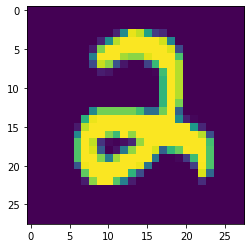

In [19]:
plt.imshow(X[0].view(28,28)) #x and X are different. 

In [20]:
print(torch.argmax(net(X[0].view(-1,28*28))[0])) #predicting the outcome.

tensor(2)
